# data import

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import scikitplot as skplt

sns.set(style="white", palette="pastel",font_scale=1.5, rc={"lines.linewidth": 2.5,'figure.figsize':(11.7,8.27)})
pd.options.display.max_columns = None

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [14]:
df_combined = pd.read_csv("data/exported/df_combined.csv", index_col = 0)
df_not_combined = pd.read_csv("data/exported/df_not_combined.csv", index_col = 0)
df_yeast_not_combined = pd.read_csv("data/exported/df_yeast_not_combined.csv", index_col = 0)
df_yeast_combined = pd.read_csv("data/exported/df_yeast_combined.csv", index_col = 0)

In [ ]:
df_not_combined = df_not_combined.astype({"base_1":"category","base_2":"category","base_3":"category",\
                                          "base_4":"category","base_5":"category","modified_status":"category"})
df_not_combined = df_not_combined.astype({"ref_number":"object"})

In [ ]:
df_combined = df_combined.astype({"base_1":"category","base_2":"category","base_3":"category",\
                                          "base_4":"category","base_5":"category","modified_status":"category",
                                  "modified_status_rolling_max":"object"})
df_combined = df_combined.astype({"ref_number":"object"})

In [ ]:
df_yeast_not_combined = df_yeast_not_combined.astype({"base_1":"category","base_2":"category","base_3":"category",\
                                          "base_4":"category","base_5":"category"})
df_yeast_not_combined = df_yeast_not_combined.astype({"ref_number":"object"})

In [15]:
df_yeast_combined = df_yeast_combined.astype({"base_1":"category","base_2":"category","base_3":"category",\
                                          "base_4":"category","base_5":"category"})
df_yeast_combined = df_yeast_combined.astype({"ref_number":"object"})

In [24]:
df_combined["modified"] = df_combined.modified_status.astype(int) + df_combined.modified_status_rolling_max
label_dict = {2.0:"Modified",1.0:"Modified Neighbour",0.0:"Unmodified"}
label_enc = [label_dict[elm] for elm in df_combined.modified.values]
df_combined["modified"] = label_enc

# limitation preprocessor combined

In [17]:
imputer1_combined = SimpleImputer(strategy="median")
scaler1_combined = StandardScaler()
numeric_transformer_combined = make_pipeline(imputer1_combined,scaler1_combined)


imputer2_combined = SimpleImputer(strategy='constant', fill_value='missing')
encoder_combined = OneHotEncoder(handle_unknown='error')
cat_transformer_combined = make_pipeline(imputer2_combined,encoder_combined)

In [18]:
numeric_features_combined_limited = ["dwell_time_median","dwell_time_rolling_min","dwell_time_diff_to_median"]

#preprocessing pipeline to scale numeric and onehot encode categorical values


preprocessor_combined_limited = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_combined, numeric_features_combined_limited)
    ])

# umap

In [ ]:
import umap
umap = umap.UMAP()

In [26]:
embedding = umap.fit_transform(preprocessor_combined_limited.fit_transform(df_combined))

umap_df = pd.DataFrame(embedding)
umap_df["modified"] = df_combined.modified.astype("category")
umap_df.columns = ["umap_dim_1","umap_dim_2","modified_status"]

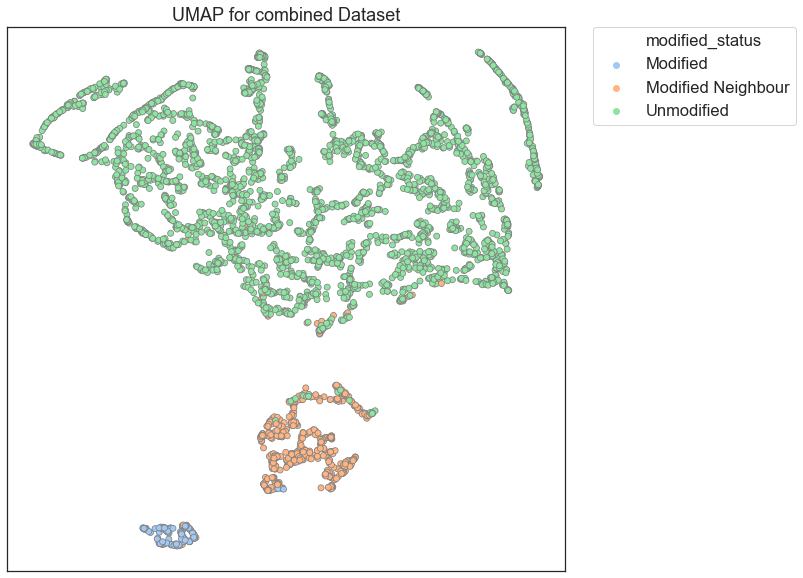

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="umap_dim_2", y="umap_dim_1", data = umap_df, hue="modified_status", edgecolor="grey")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.title("UMAP for combined Dataset")
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([]);

# TSNE

In [36]:
from sklearn.manifold import TSNE

In [37]:
tsne = TSNE(random_state=7, perplexity = 50)
tsne_combined = tsne.fit_transform(preprocessor_combined_limited.fit_transform(df_combined))
df_combined_w_tsne = pd.concat([df_combined.modified,pd.Series(tsne_combined[:,0]).rename("tsne_d1"),
                  pd.Series(tsne_combined[:,1]).rename("tsne_d2")],axis=1, )

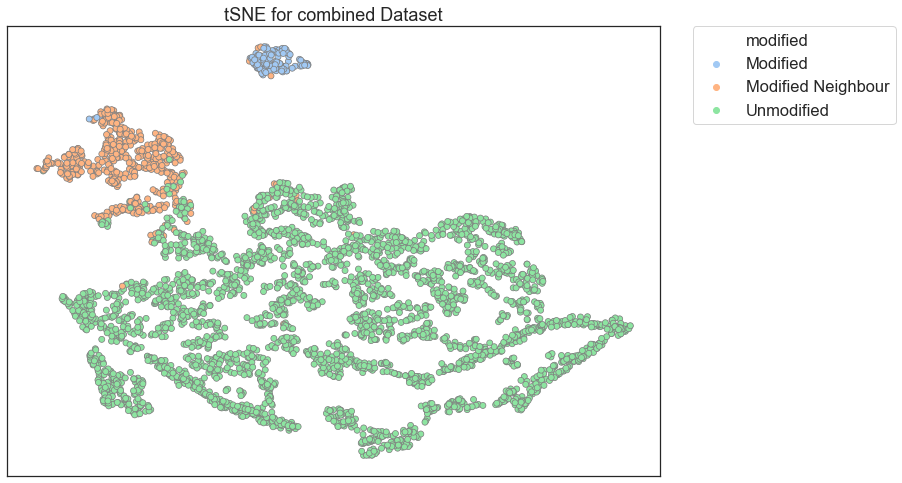

In [38]:
sns.scatterplot(data = df_combined_w_tsne, x = "tsne_d1", y = "tsne_d2", hue = "modified", edgecolor="grey")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.title("tSNE for combined Dataset")
plt.xlabel("")
plt.ylabel("")
plt.xticks([])
plt.yticks([]);
    

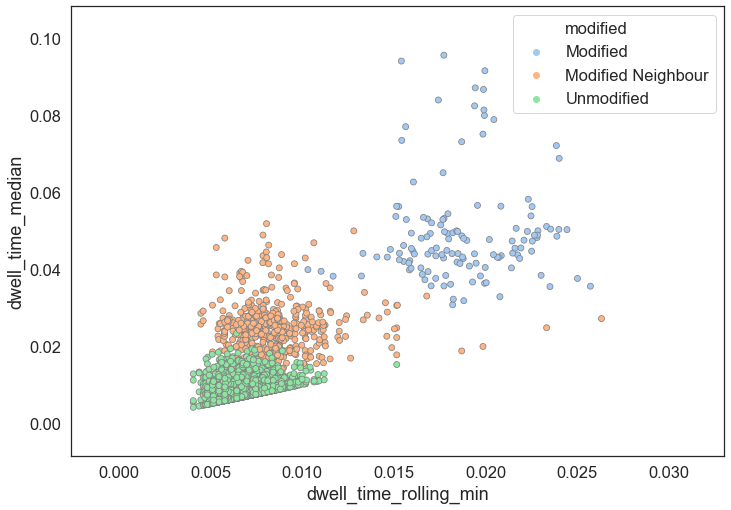

In [57]:
sns.scatterplot(data=df_combined, x="dwell_time_rolling_min", y="dwell_time_median", hue="modified", edgecolor="grey");

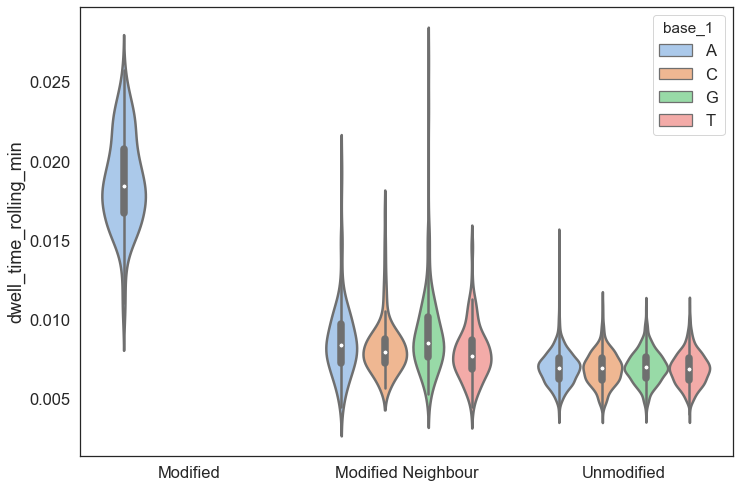

In [59]:
sns.violinplot(data=df_combined, y="dwell_time_rolling_min", x="modified", hue="base_1")
plt.xlabel("");

In [54]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 0 to 3919
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   file_name                    3920 non-null   object  
 1   ref_number                   3920 non-null   object  
 2   ref_pos                      3920 non-null   int64   
 3   ref_kmer                     3920 non-null   object  
 4   dwell_time_median            3920 non-null   float64 
 5   dwell_time_std               3920 non-null   float64 
 6   dwell_time_min               3920 non-null   float64 
 7   dwell_time_max               3920 non-null   float64 
 8   median_value_median          3920 non-null   float64 
 9   median_value_std             3920 non-null   float64 
 10  median_value_min             3920 non-null   float64 
 11  median_value_max             3920 non-null   float64 
 12  modified_status              3920 non-null   category
 13  bas